In [1]:
from MFEA_lib.model import AbstractModel, SMP_MFEA, MFEA_base, SMP_DE
from MFEA_lib.model.utils import *
from MFEA_lib.model.utils import TuningModel
import pandas as pd
import numpy as np
import scipy.io
from MFEA_lib.tasks.Benchmark.Funcs import * 
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *


In [9]:
lsa_21 = loadModel("./RESULTS/__static__/GECCO20/LSA_2021/LSA_2021_MTOMSO_Benchmark_8.mso",WCCI22_benchmark.get_50tasks_benchmark(8)[0])
model = loadModel('./RESULTS/result/smpMFEA_cec17.mso', WCCI22_benchmark.get_50tasks_benchmark(8)[0])
old_model = loadModel("./RESULTS/__static__/GECCO20/SMP_NEWSBX_TUN_50/Gecco_id_8.mso",  WCCI22_benchmark.get_50tasks_benchmark(8)[0])

compare = CompareModel([model, old_model])
compare.detail_compare_result(min_value=1e-6, round= 7)

,MFEA_lib.model.SMP_DE,MFEA_lib.model.SMP_MFEA
Task1,730.0790703,(+)48.9726999
Task2,(+)0.0,(+)2e-07
Task3,158.1979084,(+)153.2585061
Task4,(+)0.0,(+)0.0
Task5,(+)12.6020083,42.1176825
Task6,(+)46.2287597,751.528497
Task7,(+)19.9100844,19.9568022
Task8,(+)108.4504971,114.7165476
Task9,(+)0.0,(+)1e-07
Task10,(+)13.6566326,19.8940753


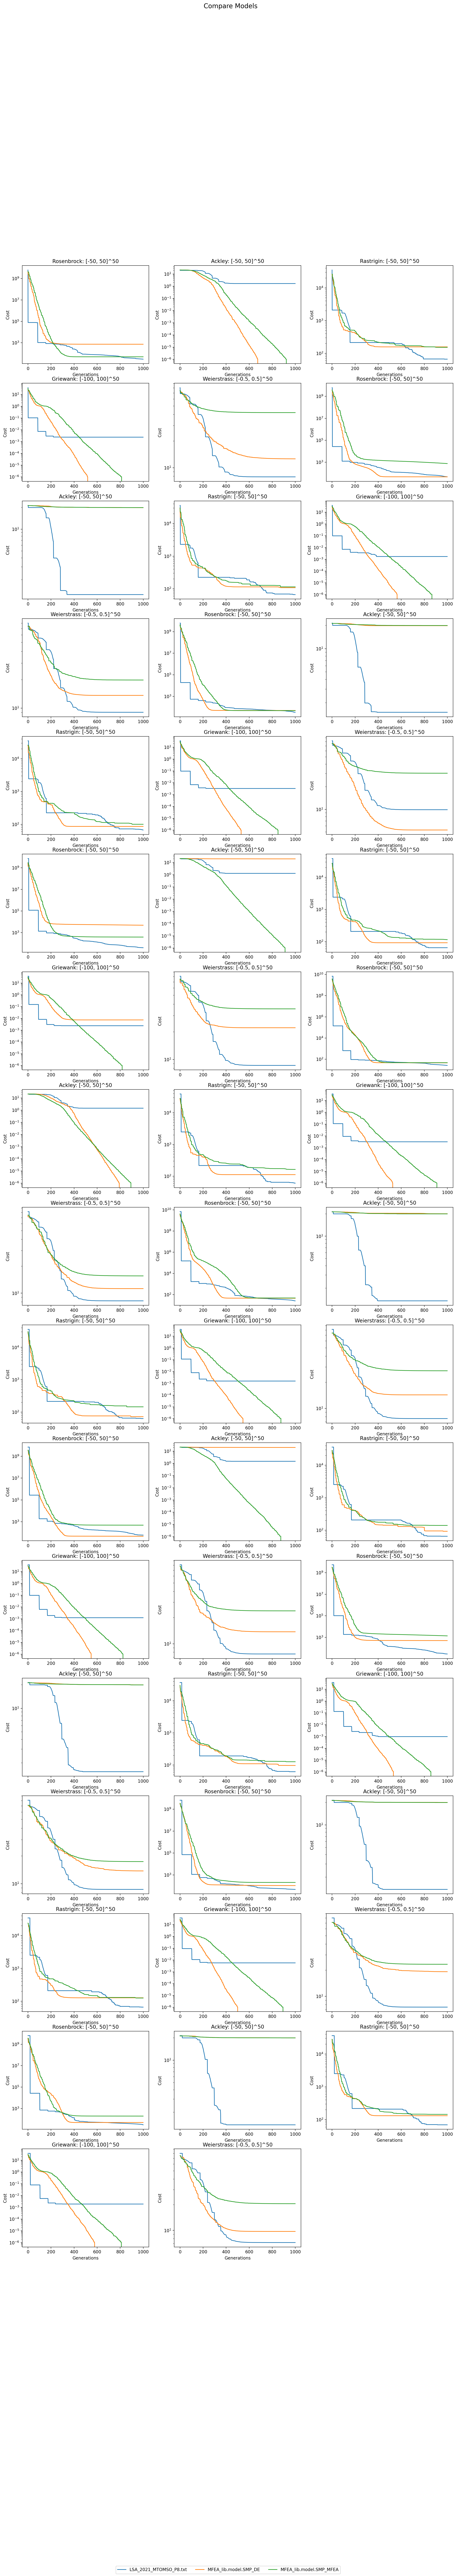

In [8]:
compare.render(min_cost= 1e-6,yscale='log')

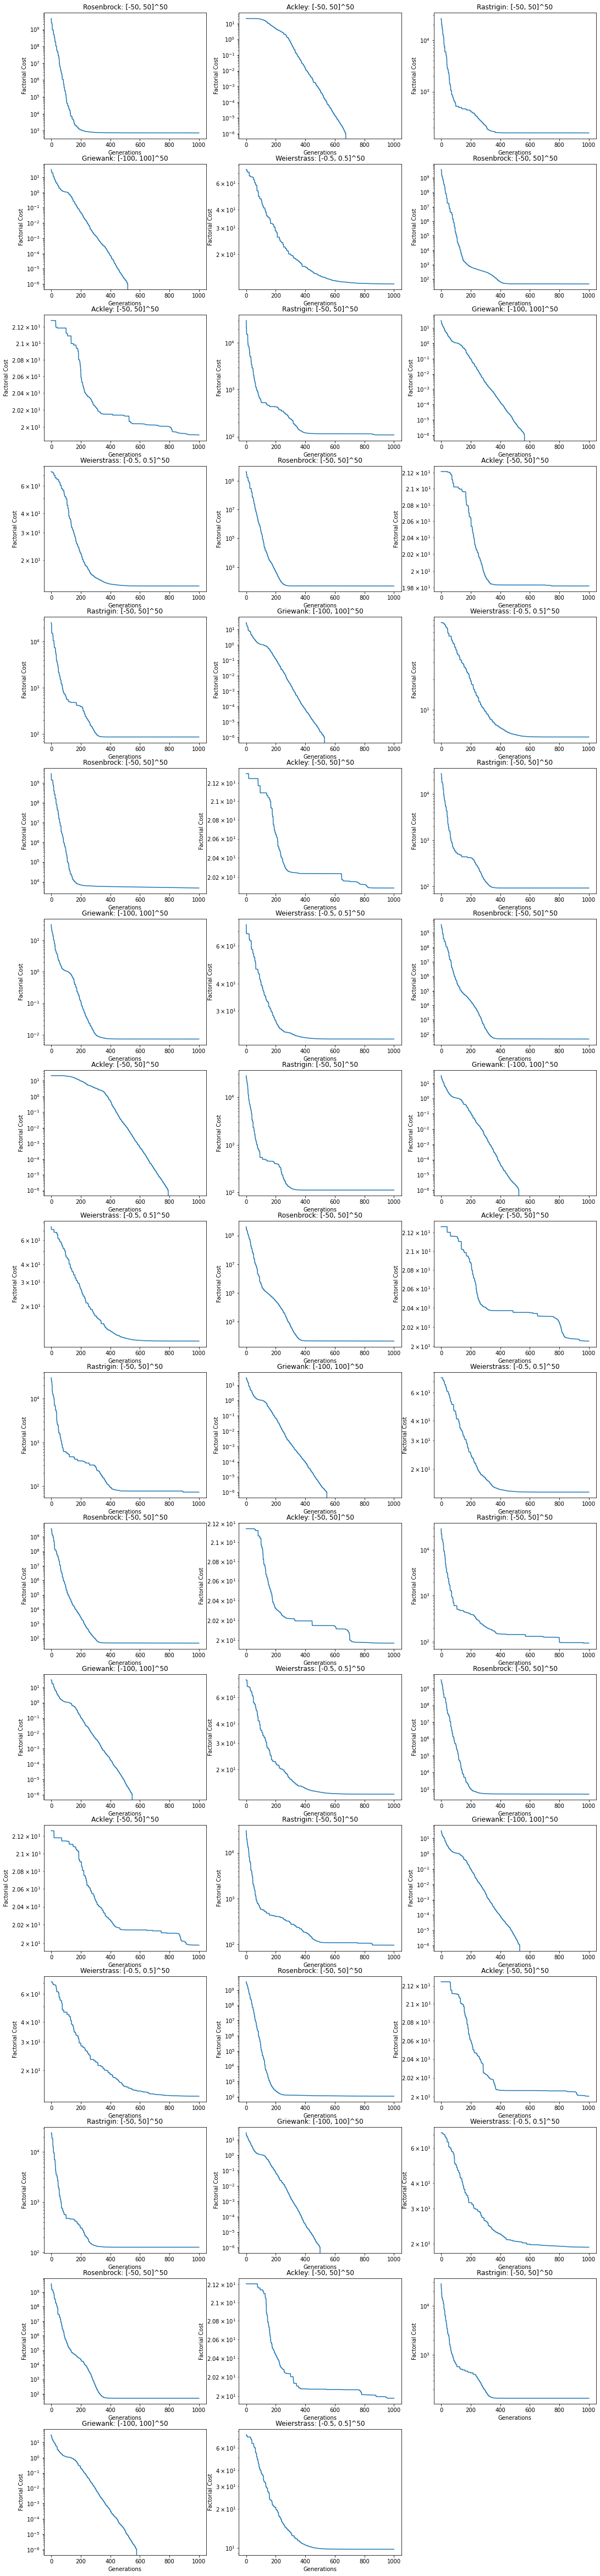

In [6]:
model.render_history(yscale= 'log')

### Tuning Model

In [2]:
ls_benchmark = [] 
ls_IndClass = [] 
name_benchmarks = []
for id in range(1, 10):
    # print(id) 
    b, i = WCCI22_benchmark.get_complex_benchmark(4)
    name_benchmarks.append("wcci_2tasks_" + str(id))
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)
name_benchmarks.append("CEC_10_")

<h3> Khởi tạo Tuning Model </h3>
model = TuningModel(model_name = ..., list_parameter  = ..., nb_run = 1) 
<p></p>
-  nb_run: số  lần chạy 
<p></p>
- list_parameter là một list trong đó mỗi phần tử là một tuple 
<p></p>
Ex.một phần tử là lr : ('lr', [0.4, 0.5]) 
<p></p>
ở vị trí đầu tiên của phần tử là tên của tham số 
<p></p>
<p></p>
ở vị trí thú hai của phần tử là danh sách giá trị của tham số đó để tuning
<p></p>
Đối với tham số  như gamma trong sbx : ('crossover', {'gammma': [0.4, 0.6]})
<p></p>
vị trí đầu tiền của phần tử là tên tham số  nhận giá trị của sbx 
<p></p>
ví trị thứ hai của phần tử là một dict với key là tên của các tham số  trong sbx - ở đây là gamma và value là danh sách giá trị gamma cần tuning



<h3> Compile Tuning Model </h3> 
model.compile(
    <p></p>
    ls_benchmark = ... , 
    <p></p>
    benchmark_weights = ..., 
    <p></p>
    name_benchmark = ...., 
    <p></p>
    ls_Indclass = ...., 
    <p></p>
    danh sách tham số  compile cho model cần tuning như smp_mfea, mfea1
    <p></p>
)

<p></p>
- ls_benchmark : dạng list, là danh sách các benchmark cần tuning 
<p></p>
- name_benchmark: dạng list, là danh sách tên benchmark cần tuning  
<p></p>
- ls_IndClass : dạng list, là danh sách IndClass 
<p></p>




<h3> Run Tuning Model </h3> 
model.run(
    <p></p>
    path = ..., 
    <p></p>
    replace_folder = ..., 
    <p></p>
    min_value = ..., 
    <p></p>
    danh sách tham số dành cho fit model nhỏ ví dụ như smp_mfea.fit

)
<p></p>
- path: str, là đường dẫn để lưu model và kết quả tuning
<p></p>
- replace_folder = True: dạng boolean: True nếu cho phép ghi đè lên thư mục nếu thư mục tồn tại ở đường dẫn 
<p></p>
- min_value = 0 or 1e-6: những giá trị nhỏ hơn min_value sẽ được xem bằng 0 khi đem đi so sánh kết quả giữa các mô hình 
<p></p>



In [3]:
model = TuningModel(
    model_name= SMP_MFEA, 
    
    list_parameter= [
        ('crossover', {
            'gamma': [0.4, 0.6]
        }), 
        ('lr', [0.04, 0.05]),
        ('crossover', {
            'alpha': [5, 7]
        }), 
    ],
)
model.compile(
    ls_benchmark = ls_benchmark, 
    benchmark_weights = (np.ones(shape= (10,)) / 10).tolist(), 
    name_benchmark = [str(i) for i in range(1,11)],
    ls_IndClass = ls_IndClass,

    crossover= newSBX(nc = 2, gamma= 0.4, alpha = 6),
    mutation = GaussMutation(scale = 0.01),
    selection= ElitismSelection(random_percent= 0.),
    attr_tasks = ['crossover', 'mutation']
)

fit, com, result = model.run(
    replace_folder=True,
    min_value = 1e-6,
    
    nb_generations= 5, 
    nb_inds_each_task= 100, 
    nb_inds_min= 100,
    lr = 0.05,  
    p_const_intra= 0, 
    p_mutate= 0.1, 
    prob_search = 0.,
    nb_epochs_stop= 1000, 
    swap_po= False,
    evaluate_initial_skillFactor= True
)


 crossover

 gamma
0.4
Time: 00m 7.11s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Saved
Time: 00m 0.31s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Saved
Time: 00m 0.34s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Saved
Time: 00m 0.35s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Saved
Time: 00m 0.47s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Saved
Time: 00m 0.34s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Saved
Time: 00m 0.36s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.31E+03  1.31E+03  ,  
[0.5 0.5]
[592. 608.]
END!
DONE!
Sa

### MultBenchmark Model 

<h3> Khởi tạo MultiBenchmark Model </h3> 
<p></p>
smpModel = MultiBenchmark(
<p></p>
    ls_benchmark = ls_benchmark, 
<p></p>
    name_benchmark = [str(i) for i in range(1,4)],
<p></p>
    ls_IndClass = ls_IndClass,
<p></p>
    model= SMP_MFEA
<p></p>
)
<p></p>
- ls_benchmark : dạng list, là danh sách các benchmark cần chạy nhiều lần
<p></p>
- name_benchmark : dạng list, là danh sách tên benchmark 
<p> </p> 
- ls_IndClass : dạng list, là danh sách IndClass tương ứng với benchmark 
<p> </p>
 



<h3> Compile, fit, run Model </h3> 
- compile : các tham số cho model như mfea, smp chạy hàm compile  
<p></p>
- fit: các tham số cho model như smp chạy hàm fit
<p> </p> 
- run: gồm nb_run: số lần chạy một mô hình , 
save_path: đường dẫn thuư mục để lưu model 


In [4]:
ls_benchmark = [] 
ls_IndClass = [] 
for id in range(1, 3): 
    b, i = CEC17_benchmark.get_2tasks_benchmark(id) 
    ls_benchmark.append(b) 
    ls_IndClass.append(i) 

b, i = CEC17_benchmark.get_10tasks_benchmark() 
ls_benchmark.append(b)
ls_IndClass.append(i)

smpModel = MultiBenchmark(
    ls_benchmark = ls_benchmark, 
    name_benchmark = [str(i) for i in range(1,4)],
    ls_IndClass = ls_IndClass,
    model= SMP_MFEA
)

smpModel.compile(
    crossover= newSBX(nc = 2, gamma= 0.6, alpha = 7),
    mutation= GaussMutation(scale= 0.1),
    # mutation = GMMScale(alpha = 3, lenMem= 20, default_scale= 0.5),
    selection= ElitismSelection(random_percent= 0.),
    attr_tasks = ['crossover', 'mutation'],
    
)
smpModel.fit(
    nb_generations= 10, nb_inds_each_task= 100, nb_inds_min= 100,
    lr = 0.1, p_const_intra= 0.0, p_mutate= 0.1,prob_search = 0.0,
    nb_epochs_stop= 50, 
    evaluate_initial_skillFactor= True
)
smpModel.run(
    nb_run= 2,
    save_path= './RESULTS/result/smpMFEA_cec17.mso'
)

Time: 00m 0.55s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.90E+01  1.87E+04  ,  
[0.5 0.5]
[1144. 1056.]
END!
Time: 00m 0.47s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 1.52E+01  1.50E+04  ,  
[0.5 0.5]
[1112. 1088.]
END!
DONE!
Cannot Saved
Time: 00m 0.46s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 2.12E+01  1.79E+04  ,  
[0.5 0.5]
[1120. 1080.]
END!
Time: 00m 0.44s  100 % [====================>]  Pop_size: 2.00E+02  ,  Cost: 2.13E+01  1.68E+04  ,  
[0.5 0.5]
[1074. 1126.]
END!
DONE!
Cannot Saved
Time: 00m 3.03s  100 % [====================>]  Pop_size: 1.00E+03  ,  Cost: 7.96E+04  1.66E+05  1.94E+05  2.93E+01  1.92E+09  2.11E+01  7.17E+01  1.55E+04  4.30E+01  4.95E+04  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[1084. 1092. 1144. 1074. 1108. 1064. 1072. 1172. 1054. 1136.]
END!
Time: 00m 3.03s  100 % [====================>]  Pop_size: 1.00E+03  ,  Cost: 6.83E+04  1.89E+05  1.92E+05  3.12E+01  2.23E+09  2.12E+01  7.13E+01  1.38E

<h3> print result </h3> 

print_attr : dạng list, là tên các giá trị trung bình muốn in ra 
<p> </p> 
print_name : True nếu muốn in tên bộ benchmark 
<p> </p> 
print_time : True nếu muốn in thời gian chạy từng bộ benchmark 
<p> </p> 
print_name_attr: True nếu muốn in tên của từng giá trị trung bình

In [5]:
smpModel.print_result(print_attr = ['history_cost'],print_name = True, print_time = False, print_name_attr = False)

1
[1.71E+01 1.69E+04]
2
[2.12E+01 1.74E+04]
3
[7.40E+04 1.78E+05 1.93E+05 3.03E+01 2.08E+09 2.11E+01 7.15E+01 1.47E+04
 4.76E+01 4.66E+04]
